In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [2]:
X,y = mnist.data, mnist.target

In [3]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
baseline_accuracy = knn_clf.score(X_test,y_test)
baseline_accuracy

0.9700714285714286

In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'weights':['uniform','distance'],'n_neighbors':[3,4,5,6]}]
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10000],y_train[:10000])

,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [3, 4, ...], 'weights': ['uniform', 'distance']}]"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,4


In [7]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [8]:
grid_search.best_score_

np.float64(0.9483)

In [ ]:
grid_search.best_estimator_.fit(X_train,y_train)
tuned_accuracy = grid_search.score(X_test,y_test)
tuned_accuracy

0.9731428571428572

In [12]:
from scipy.ndimage import shift

def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dy,dx], cval=0, mode= 'constant')
    return shifted_image.reshape([-1])

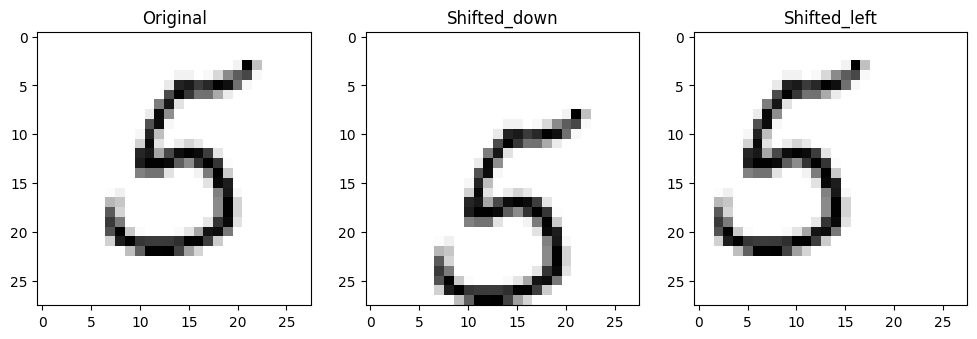

In [18]:
import matplotlib.pyplot as plt
image = X_train[0]
shifted_image_down = shift_image(image,0,5)
shifted_image_left = shift_image(image,-5,0)
plt.figure(figsize=(12,13))

plt.subplot(131)
plt.title('Original')
plt.imshow(image.reshape(28,28),
           interpolation = 'nearest', cmap='Greys')

plt.subplot(132)
plt.title('Shifted_down')
plt.imshow(shifted_image_down.reshape(28,28),
           interpolation = 'nearest', cmap='Greys')

plt.subplot(133)
plt.title('Shifted_left')
plt.imshow(shifted_image_left.reshape(28,28),
           interpolation = 'nearest', cmap='Greys')

In [ ]:
import numpy as np
X_train_augmented = [image for image in X_train]

y_train_augmented = [label for label in y_train]
directions = ((1,0),(-1,0),(0,1),(0,-1))
for dx, dy in directions:
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image,dx,dy))
        y_train_augmented.append(shift_image(image,dx,dy))
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
shuffle_idx=np.random.permuatations(len(X_train_augmented))
X_train_augmented = X_train_augumented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)
knn_clf.fit(X_train_augmented,y_train_augmented)

In [ ]:
augmented_accuracy = knn_clf.score(X_test,y_test)
augmented_accuracy

In [ ]:
error_rate_change = (1- augmented_accuracy)/(1-tuned_accuracy) - 1
print(f"error_rate_change = {error_rate_change:.0%}")